<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/AR_Time_Series_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
#!pip install statsmodels --upgrade

In [0]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

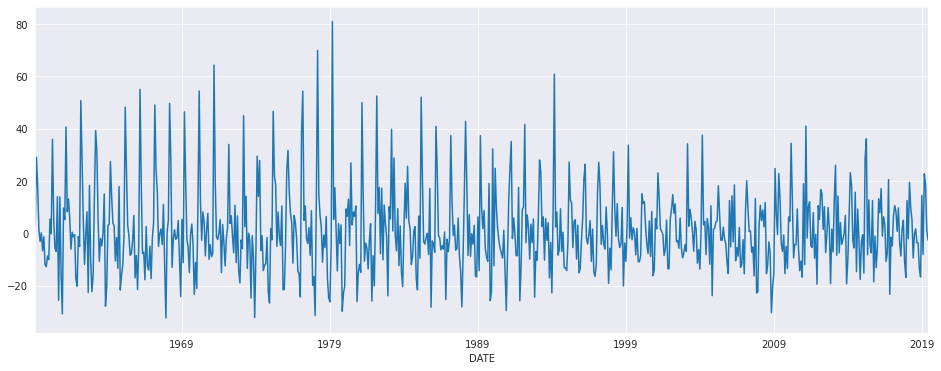

In [0]:
data = pdr.get_data_fred('HOUSTNSA', '1959-01-01', '2019-06-01')
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq('MS')
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [0]:
housing.head()

DATE
1959-02-01     2.910603
1959-03-01    28.989899
1959-04-01    18.089272
1959-05-01     1.127321
1959-06-01    -3.081967
Freq: MS, Name: HOUSTNSA, dtype: float64

In [0]:
mod = AutoReg(housing, 3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Thu, 07 May 2020   AIC                              5.468
Time:                        02:05:04   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155      0.877      -0.067       0.079
HOUSTNSA.L3    -0.1939      0.036     -5.319      0.000      -0.265      -0.122
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9680           -1.3298j            1.6448           -0.1499
AR.2            0.9680           +1.3298j            1.6448            0.1499
AR.3           -1.9064           -0.0000j            1.9064           -0.5000
-----------------------------------------------------------------------------
"""

In [0]:
mod = AutoReg(housing, 4)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(4)   Log Likelihood               -2971.605
Method:               Conditional MLE   S.D. of innovations             14.918
Date:                Thu, 07 May 2020   AIC                              5.422
Time:                        02:18:04   BIC                              5.460
Sample:                    06-01-1959   HQIC                             5.436
                         - 06-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.3762      0.561      2.455      0.014       0.278       2.475
HOUSTNSA.L1     0.1482      0.036      4.082      0.000       0.077       0.219
HOUSTNSA.L2     0.0075      0.036      0.206      0.837      -0.064       0.079
HOUSTNSA.L3    -0.1516      0.036     -4.183      0.000      -0.223      -0.081
HOUSTNSA.L4    -0.2215      0.036     -6.105      0.000      -0.293      -0.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8920           -0.9382j            1.2945           -0.1290
AR.2            0.8920           +0.9382j            1.2945            0.1290
AR.3           -1.2341           -1.0820j            1.6412           -0.3854
AR.4           -1.2341           +1.0820j            1.6412            0.3854
-----------------------------------------------------------------------------
"""

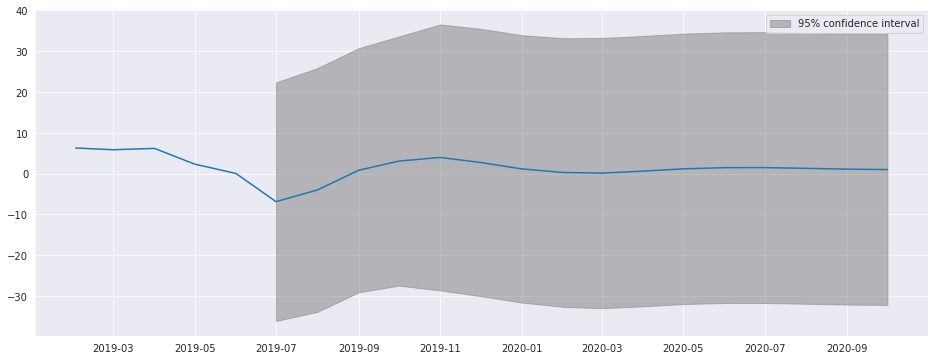

In [0]:
fig = res.plot_predict(720, 740)

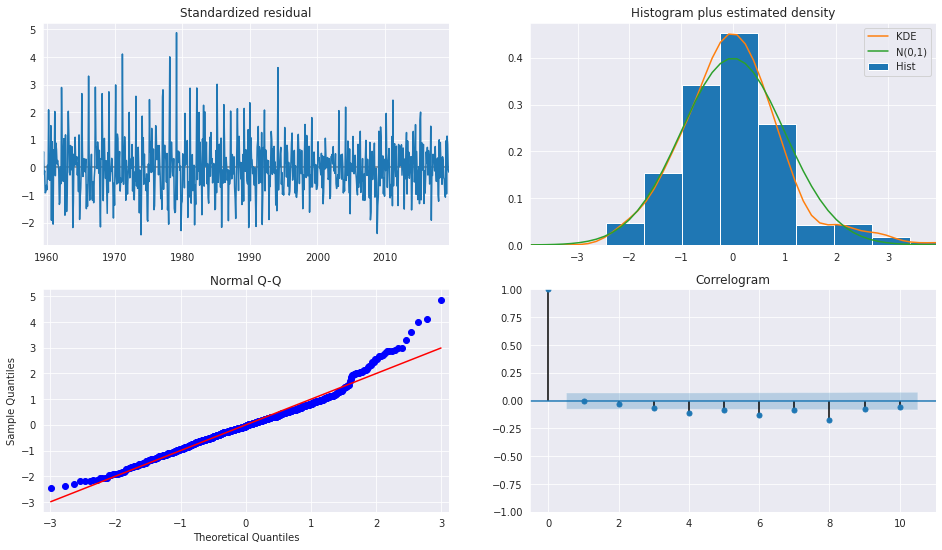

In [0]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=10)

In [0]:
sel = ar_select_order(housing, 10, seasonal=True)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Thu, 07 May 2020   AIC                              4.541
Time:                        02:30:38   BIC                              4.636
Sample:                    04-01-1959   HQIC                             4.578
                         - 06-01-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.2726      1.373      0.927      0.354      -1.418       3.963
seasonal.1     32.6477      1.824     17.901      0.000      29.073      36.222
seasonal.2     23.0685      2.435      9.472      0.000      18.295      27.842
seasonal.3     10.7267      2.693      3.983      0.000       5.449      16.005
seasonal.4      1.6792      2.100      0.799      0.424      -2.437       5.796
seasonal.5     -4.4229      1.896     -2.333      0.020      -8.138      -0.707
seasonal.6     -4.2113      1.824     -2.309      0.021      -7.786      -0.636
seasonal.7     -6.4124      1.791     -3.581      0.000      -9.922      -2.902
seasonal.8      0.1095      1.800      0.061      0.952      -3.419       3.638
seasonal.9    -16.7511      1.814     -9.234      0.000     -20.307     -13.196
seasonal.10   -20.7023      1.862    -11.117      0.000     -24.352     -17.053
seasonal.11   -11.9554      1.778     -6.724      0.000     -15.440      -8.470
HOUSTNSA.L1    -0.2953      0.037     -7.994      0.000      -0.368      -0.223
HOUSTNSA.L2    -0.1148      0.037     -3.107      0.002      -0.187      -0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2862           -2.6564j            2.9514           -0.3218
AR.2           -1.2862           +2.6564j            2.9514            0.3218
-----------------------------------------------------------------------------
"""

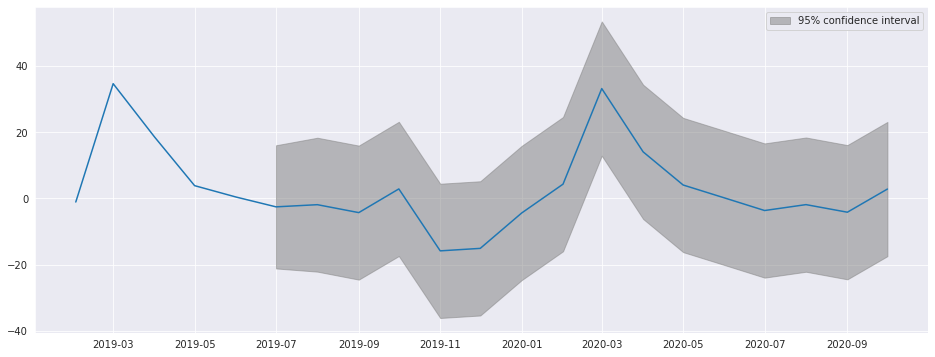

In [0]:
fig=res.plot_predict(720, 740)

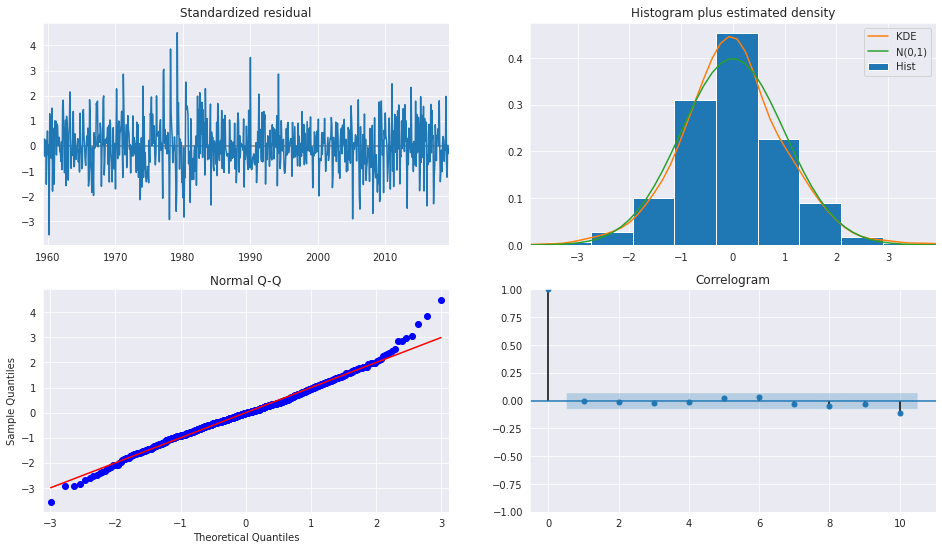

In [0]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=10p)

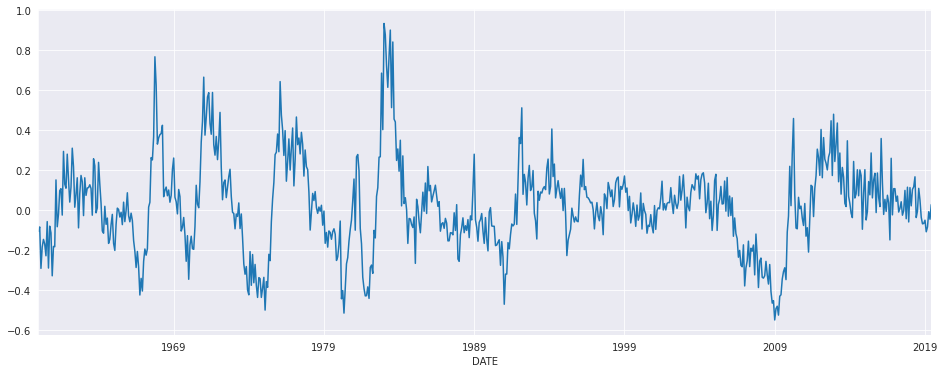

In [0]:
yoy_housing = data.HOUSTNSA.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_housing.plot(ax=ax)

In [0]:
yoy_housing.tail()

DATE
2019-02-01   -0.108138
2019-03-01   -0.083955
2019-04-01   -0.007660
2019-05-01   -0.045271
2019-06-01    0.027679
Freq: MS, Name: HOUSTNSA, dtype: float64

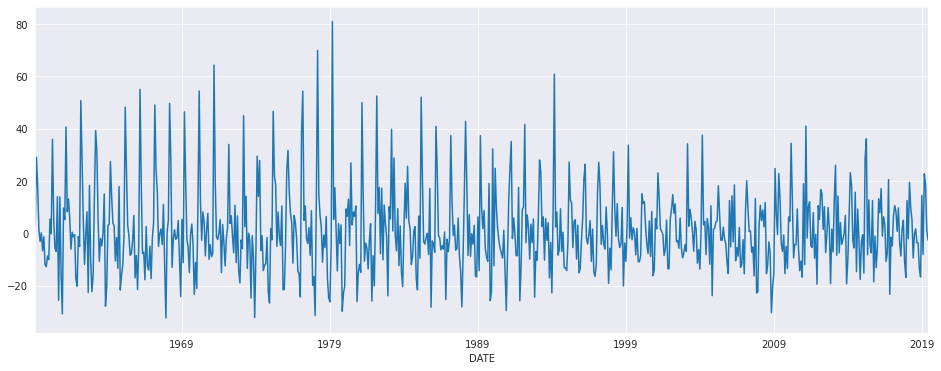

In [0]:
yoy_housing = data.HOUSTNSA.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [0]:
sel = ar_select_order(yoy_housing, 13)
sel.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [0]:
sel = ar_select_order(yoy_housing, 13, glob=True)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               HOUSTNSA   No. Observations:                  714
Model:             Restr. AutoReg(13)   Log Likelihood                 589.177
Method:               Conditional MLE   S.D. of innovations              0.104
Date:                Thu, 07 May 2020   AIC                             -4.496
Time:                        02:57:09   BIC                             -4.444
Sample:                    02-01-1961   HQIC                            -4.476
                         - 06-01-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0035      0.004      0.875      0.382      -0.004       0.011
HOUSTNSA.L1      0.5640      0.035     16.167      0.000       0.496       0.632
HOUSTNSA.L2      0.2347      0.038      6.238      0.000       0.161       0.308
HOUSTNSA.L3      0.2051      0.037      5.560      0.000       0.133       0.277
HOUSTNSA.L7     -0.0903      0.030     -2.976      0.003      -0.150      -0.031
HOUSTNSA.L12    -0.3791      0.034    -11.075      0.000      -0.446      -0.312
HOUSTNSA.L13     0.3354      0.033     10.254      0.000       0.271       0.400
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0309           -0.2682j            1.0652           -0.4595
AR.2            -1.0309           +0.2682j            1.0652            0.4595
AR.3            -0.7454           -0.7417j            1.0515           -0.3754
AR.4            -0.7454           +0.7417j            1.0515            0.3754
AR.5            -0.3172           -1.0221j            1.0702           -0.2979
AR.6            -0.3172           +1.0221j            1.0702            0.2979
AR.7             0.2419           -1.0573j            1.0846           -0.2142
AR.8             0.2419           +1.0573j            1.0846            0.2142
AR.9             0.7840           -0.8303j            1.1420           -0.1296
AR.10            0.7840           +0.8303j            1.1420            0.1296
AR.11            1.0730           -0.2386j            1.0992           -0.0348
AR.12            1.0730           +0.2386j            1.0992            0.0348
AR.13            1.1193           -0.0000j            1.1193           -0.0000
------------------------------------------------------------------------------
"""

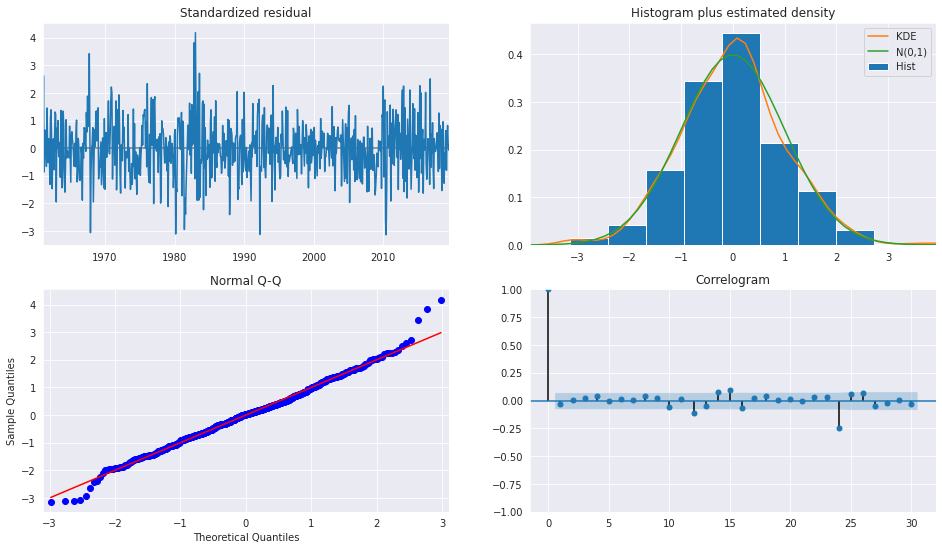

In [0]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

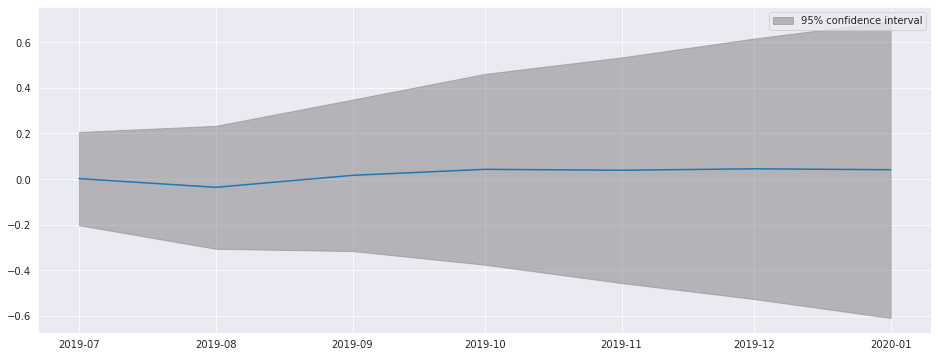

In [0]:
fig = res.plot_predict(714, 720)

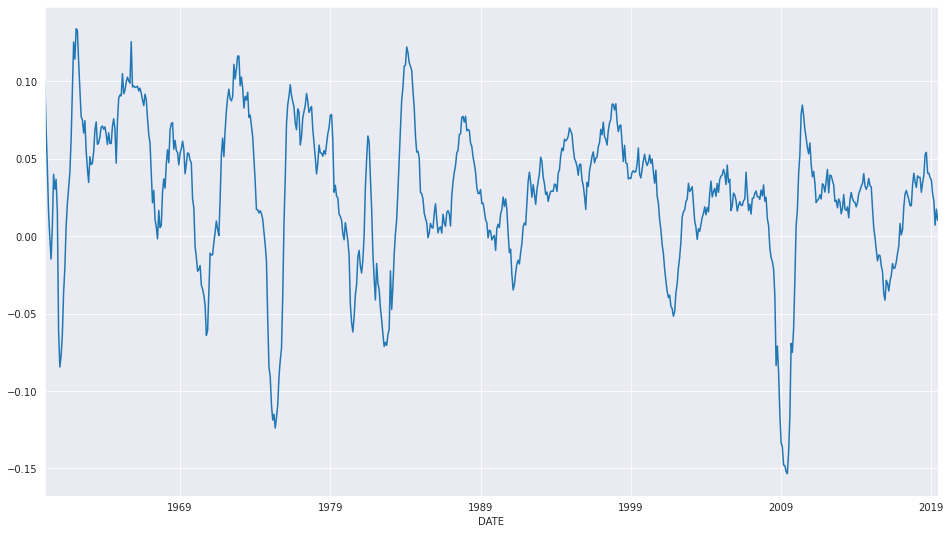

In [0]:
# industrial index
data = pdr.get_data_fred('INDPRO', '1959-01-01', '2019-06-01')
ind_prod = data.INDPRO.pct_change(12).dropna().asfreq('MS')
_, ax = plt.subplots(figsize=(16,9))
ind_prod.plot(ax=ax)

In [0]:
sel = ar_select_order(ind_prod, 13, 'bic')
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:                    AutoReg(13)   Log Likelihood                2318.848
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Thu, 07 May 2020   AIC                             -9.411
Time:                        04:36:45   BIC                             -9.313
Sample:                    02-01-1961   HQIC                            -9.373
                         - 06-01-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.896      0.004       0.000       0.002
INDPRO.L1      1.1504      0.035     32.940      0.000       1.082       1.219
INDPRO.L2     -0.0747      0.053     -1.407      0.159      -0.179       0.029
INDPRO.L3      0.0043      0.053      0.081      0.935      -0.099       0.107
INDPRO.L4      0.0027      0.053      0.052      0.959      -0.100       0.106
INDPRO.L5     -0.1383      0.052     -2.642      0.008      -0.241      -0.036
INDPRO.L6      0.0085      0.052      0.163      0.871      -0.094       0.111
INDPRO.L7      0.0375      0.052      0.720      0.471      -0.065       0.139
INDPRO.L8     -0.0235      0.052     -0.453      0.651      -0.125       0.078
INDPRO.L9      0.0945      0.052      1.824      0.068      -0.007       0.196
INDPRO.L10    -0.0844      0.052     -1.627      0.104      -0.186       0.017
INDPRO.L11     0.0024      0.052      0.047      0.962      -0.099       0.104
INDPRO.L12    -0.3809      0.052     -7.367      0.000      -0.482      -0.280
INDPRO.L13     0.3589      0.033     10.916      0.000       0.294       0.423
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0411           -0.2889j            1.0804           -0.4569
AR.2            -1.0411           +0.2889j            1.0804            0.4569
AR.3            -0.7774           -0.8064j            1.1201           -0.3721
AR.4            -0.7774           +0.8064j            1.1201            0.3721
AR.5            -0.2760           -1.0530j            1.0886           -0.2908
AR.6            -0.2760           +1.0530j            1.0886            0.2908
AR.7             0.2719           -1.0515j            1.0861           -0.2097
AR.8             0.2719           +1.0515j            1.0861            0.2097
AR.9             0.8019           -0.7297j            1.0842           -0.1175
AR.10            0.8019           +0.7297j            1.0842            0.1175
AR.11            1.0224           -0.2214j            1.0461           -0.0339
AR.12            1.0224           +0.2214j            1.0461            0.0339
AR.13            1.0578           -0.0000j            1.0578           -0.0000
------------------------------------------------------------------------------
"""

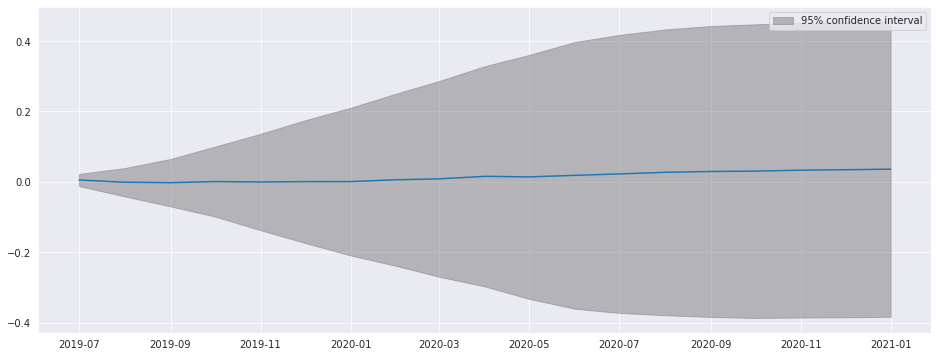

In [0]:
fig = res.plot_predict(start=714, end=732)

In [0]:
sel = ar_select_order(ind_prod, 13, 'bic', glob=True)
sel.ar_lags
res_glob = sel.model.fit()
res_glob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:             Restr. AutoReg(13)   Log Likelihood                2313.420
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Thu, 07 May 2020   AIC                             -9.421
Time:                        04:46:47   BIC                             -9.382
Sample:                    02-01-1961   HQIC                            -9.406
                         - 06-01-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.000      2.986      0.003       0.000       0.002
INDPRO.L1      1.0882      0.013     80.869      0.000       1.062       1.115
INDPRO.L5     -0.1057      0.016     -6.649      0.000      -0.137      -0.075
INDPRO.L12    -0.3852      0.034    -11.404      0.000      -0.451      -0.319
INDPRO.L13     0.3587      0.032     11.315      0.000       0.297       0.421
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0518           -0.2762j            1.0875           -0.4591
AR.2            -1.0518           +0.2762j            1.0875            0.4591
AR.3            -0.7718           -0.7796j            1.0970           -0.3742
AR.4            -0.7718           +0.7796j            1.0970            0.3742
AR.5            -0.2714           -1.0479j            1.0825           -0.2903
AR.6            -0.2714           +1.0479j            1.0825            0.2903
AR.7             0.2820           -1.0573j            1.0943           -0.2085
AR.8             0.2820           +1.0573j            1.0943            0.2085
AR.9             0.8021           -0.7558j            1.1021           -0.1203
AR.10            0.8021           +0.7558j            1.1021            0.1203
AR.11            1.0189           -0.2198j            1.0423           -0.0338
AR.12            1.0189           +0.2198j            1.0423            0.0338
AR.13            1.0578           -0.0000j            1.0578           -0.0000
------------------------------------------------------------------------------
"""

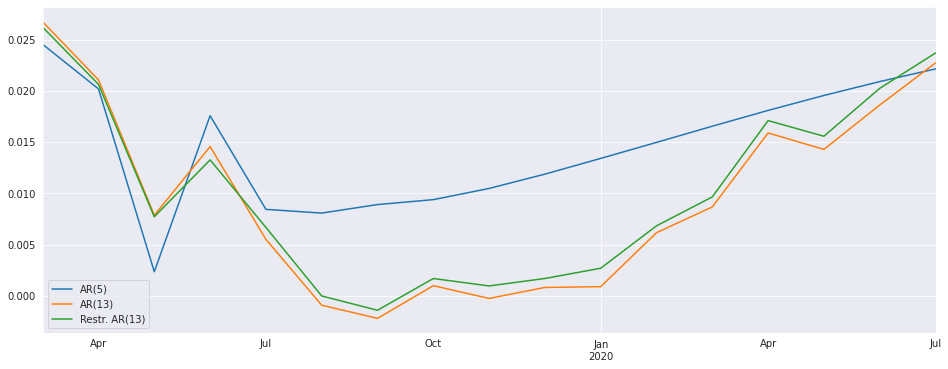

In [0]:
res_ar5 = AutoReg(ind_prod, 5).fit()
predictions = pd.DataFrame({"AR(5)": res_ar5.predict(start=710, end=726),
                            "AR(13)": res.predict(start=710, end=726),
                            "Restr. AR(13)": res_glob.predict(start=710, end=726)})
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)

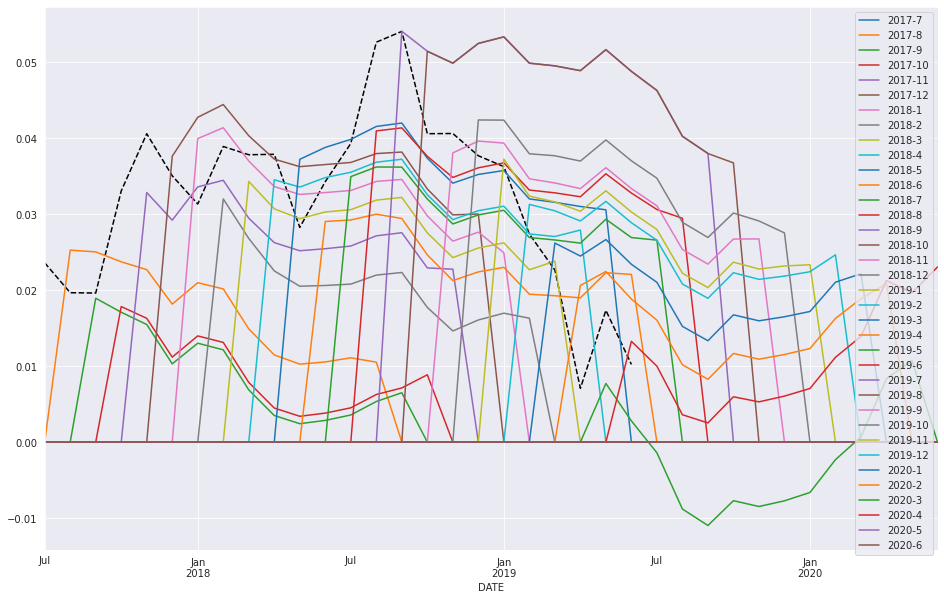

In [0]:
import numpy as np
start = ind_prod.index[-24]
forecast_index = pd.date_range(start, freq=ind_prod.index.freq, periods=36)
cols = ['-'.join(str(val) for val in (idx.year, idx.month)) for idx in forecast_index]
forecasts = pd.DataFrame(index=forecast_index,columns=cols)
for i in range(1, 24):
    fcast = res_glob.predict(start=forecast_index[i], end=forecast_index[i+12], dynamic=True)
    forecasts.loc[fcast.index, cols[i]] = fcast
_, ax = plt.subplots(figsize=(16, 10))
ind_prod.iloc[-24:].plot(ax=ax, color="black", linestyle="--")
ax = forecasts.fillna(0).plot(ax=ax)

In [0]:
forecasts.head()

,2017-7,2017-8,2017-9,2017-10,2017-11,2017-12,2018-1,2018-2,2018-3,2018-4,2018-5,2018-6,2018-7,2018-8,2018-9,2018-10,2018-11,2018-12,2019-1,2019-2,2019-3,2019-4,2019-5,2019-6,2019-7,2019-8,2019-9,2019-10,2019-11,2019-12,2020-1,2020-2,2020-3,2020-4,2020-5,2020-6
2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,NaN,0.0252718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,NaN,0.0250366,0.0189369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-01,NaN,0.0237328,0.0170951,0.0178419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-01,NaN,0.0227058,0.0154825,0.0162951,0.0328543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
forecast_index

DatetimeIndex(['2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [0]:
forecasts.shape

(36, 36)